<a href="https://colab.research.google.com/github/Clever-Lazinezz/Portfolio/blob/main/Loan_Approval_Model_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Purpose and Overview

### Objective

The goal of this analysis is to create an accurate logistic regression model which predicts if a client will be approved for a loan given a set of categorical data.

### Why This Project Is Important

Financial Institutes have historically used guidelines(and human bias) to decide on loan approvals. AI applications are used to decrease the bias in these credit decisions. A recurring issue with Machine Learning(ML) models is that they rely on the quality, accuracy, and quantity of relevant data. However, it is the responsibility of the model creators to try their best to select data categories that are the least likely to be biased. In addition, data scientists can account for some biases and utilize tests(such as one-way ANOVAs) to measure mean differences in datasets with a race/ethnicity category. Furthermore, AI applications have the potential to save companies money through employee cost, risk minimization, and processing speed.


### Info On Data Set

Data set taken from : https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

#### Problem Statement

---

##### About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

##### Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## Model Choice and Methodology

### Intro to Supervised Algorithms

This analysis will create include a logistic regression model. Logistic regression is a supervised classification algorithm. This means that the algorthim learns from labeled data. For example, if we wanted to create a supervised regression model to detect earthquakes, we would need two sets of information. The first being digital measurments collected prior to known earthquakes and the second being measurments collected when no earthquakes occured. Parameters such as hours before a recorded earthquake and what constitutes an earthquake are necesary, but we can ignore this. The important observation is that we have a true case, an earthquake occured, and a false case, an earthquake did not occur. This true and false becomes 1 and 0 respectively. For our model we will be using Loan Approvals represented as a Y(approved) or N(not approved). 

### The Assumptions of Binary Logistic Regression

Binary logistic regression assumes the following: there are only two possible outcomes, the observed data is independent, there is a linear relationship between the explanatory variables and the logit of the estimated variable, variables are not multicollinear, there are no extreme outliers,  and the sample size is sufficiently large.


### Why Binary Logisitc Regression Is An Adequate Model

Binary logistic regression is great for predicting binary outcomes; when there are only two outcomes. As previously mentioned, we are predicting Loan Approvals represented as a Y(approved) or N(not approved). In additon, all of our intended predictor variables are independent of each other and our dataset is large enough to produce viable models. The highest coefficient of determination found between pairs of columns and loan status was 0.30162; therefore, we know that there is no multicollinearity among our explanatory variables.

#### Coefficient of Determination

Finding data categories which produce the most accurate linear model requires cleaning data(deleting null data, deleting irrelevant data, converting non-numeric values into numerics, etc.), and researching which data columns may be the most relevant. To help find these columns, we can determine the coefficient of determination for pairs of columns. The coefficient of determination assesses the variance of expected outcome values. Thus assessing the performance of a linear regression model. The points on figure xxx below are the recorded values, the line is a linear regression line, and the lines connecting each point to the regression line represent the difference between the expected outcomes and the actual outcomes. The higher the coefficient of determination, the closer the recorded values are to the predicted values. However, this test can NOT be the sole evidence of correlation between variables. If a data set is non-linear, yet its curve acts periodically, the function can produce a high coefficient of determination. Its line of best fit will seemingly splice through the center of all data points, but the difference between the expected values and actual values(residuals) would be apparent for the majority of data points. Figure xxx, illustrates the concept.

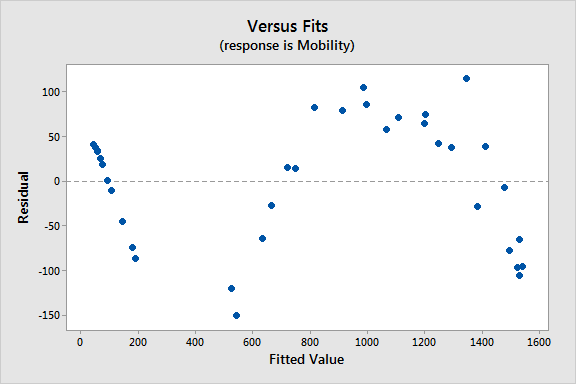

The coefficient of determinant for figure xxx is 0.98500! However, we can clearly see that the residual(y-axis) is large for the majority of our data points. 

## Analysis

Each data split will be predicting if a loan was approved or not approved. The data columns we are using are all independent, there is no multicollinearity among the explanatory variables, and the sample size is large enough. The data columns we'll use are real world variables and known to be independent. We found the highest coefficient of determination among our column pairs and the result was 0.30161. Thus we can conclude that there is no multicollinearity among our explanaotry variables. Furthermore, we have found that sample size follows a general rule of thumb; (minimum of 10 cases) * (# of explanatory variables) / frequency of least frequent outcome. Which resolves to, ((10*2)/.4518) = 44. A number smaller than any of our data splits' columns' lengths. In addition, each data split will take a randomized 33% of the data available in each split. This is done to avoid overfitting our model; making a model extremely accurate at classifying our training data, which could result in poor prediction accuracy for new data. In addition, we will be assuming there exist a linear relationship between the explanatory variables and the logit of the estimated variable. 

### First Data Split

Our first data split takes Loan Amount and Credit History as our explanatory variables. These variables produced the highest Coefficient of Determination, so we can hope that they'd produce the most accurate model of our analysis. The former, assumed to be in thousands, ranges from 9 to 700. The latter defined as a 1 or 0; 1 meaning there exist a credit history, 0 mean there exist no credit history. The mean for Credit History was 0.85066, meaning that the majority clients in our data set were approved for their loan. Our resulting model had an f1-score of 0.87. 

### Second Data Split

Our second data split takes Total Income and Credit History as explanatory variables. The former, in monthly earnings, ranges from 455 to 81,000 with a mean of 6,069. We can speculate that our model will be more accurate at predicting loan approvals when income is closer to the mean. In addition, our regression model could be significantly skewed due to more extreme values. However, we will keep these data values because we're creating a model for all income ranges. Our resulting model had an f1-score of 0.81.

### Third Data Split

Our third data split takes Loan Amount and Loan Amount Term(in days). The Latter, assumed to be in months, had a range from 36 to 480. The mean was 342.35161, and once again we can speculate that this model will be more accurate at predicting loan approvals when loan amount term is closer to the mean. Our resulting model had an f1-score of 0.72.

## Read Files

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Clever-Lazinezz/ML-Data2/main/loan_data_set.csv.xls')

## Exploritory Data Analysis

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# Checking for columns with excessive null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df['Credit_History']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [7]:
df['LoanAmount']

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [8]:
df[['Credit_History', 'LoanAmount']]

,Credit_History,LoanAmount
0,1.0,NaN
1,1.0,128.0
2,1.0,66.0
3,1.0,120.0
4,1.0,141.0
...,...,...
609,1.0,71.0
610,1.0,40.0
611,1.0,253.0
612,1.0,187.0


In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df['ApplicantIncome']

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64

In [11]:
df.columns.size

13

In [12]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
df.columns[12]

'Loan_Status'

In [14]:
df['CoapplicantIncome']

0         0.0
1      1508.0
2         0.0
3      2358.0
4         0.0
        ...  
609       0.0
610       0.0
611     240.0
612       0.0
613       0.0
Name: CoapplicantIncome, Length: 614, dtype: float64

### Deleting and Modifying Columns

In [15]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [17]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [18]:
# Deleting rows containing an null Credit History and Loan Amount
# Modifying the dateframe directly because these modifications are necesary for every data split
df.dropna(subset=['Credit_History', 'LoanAmount', 'Loan_Amount_Term'], inplace=True)

In [19]:
total_income = np.arange(0, 529)

In [20]:
df.insert(3, "Total_Income", total_income, True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 1 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            529 non-null    object 
 1   Gender             517 non-null    object 
 2   Married            527 non-null    object 
 3   Total_Income       529 non-null    int64  
 4   Dependents         517 non-null    object 
 5   Education          529 non-null    object 
 6   Self_Employed      504 non-null    object 
 7   ApplicantIncome    529 non-null    int64  
 8   CoapplicantIncome  529 non-null    float64
 9   LoanAmount         529 non-null    float64
 10  Loan_Amount_Term   529 non-null    float64
 11  Credit_History     529 non-null    float64
 12  Property_Area      529 non-null    object 
 13  Loan_Status        529 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 62.0+ KB


In [ ]:
# combining the applicant and coapplicants data into one column
"""
Definition: This method combines the values of two columns.
"""
i = 1
for x, y, z in zip(df['ApplicantIncome'], df['CoapplicantIncome'], df['Total_Income']):
  print(x + y, "\n\n")
  df['Total_Income'][i] = x + y

  i = i + 1
  

In [23]:
df

,Loan_ID,Gender,Married,Total_Income,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,6091,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,3000,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,4941,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,6000,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,9613,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,524,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,525,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,526,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,527,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [24]:
df.drop(columns=['CoapplicantIncome', 'ApplicantIncome', 'Education', 'Property_Area', 'Married'], inplace=True)

In [25]:
df

,Loan_ID,Gender,Total_Income,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,LP001003,Male,6091,1,No,128.0,360.0,1.0,N
2,LP001005,Male,3000,0,Yes,66.0,360.0,1.0,Y
3,LP001006,Male,4941,0,No,120.0,360.0,1.0,Y
4,LP001008,Male,6000,0,No,141.0,360.0,1.0,Y
5,LP001011,Male,9613,2,Yes,267.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,524,0,No,71.0,360.0,1.0,Y
610,LP002979,Male,525,3+,No,40.0,180.0,1.0,Y
611,LP002983,Male,526,1,No,253.0,360.0,1.0,Y
612,LP002984,Male,527,2,No,187.0,360.0,1.0,Y


### Converting Non-Numeric values into Numerics

In [26]:
# These objects have to be converted to Y=1; N=0 to be used in machine learning models
df['Loan_Status']

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 529, dtype: object

In [27]:
df['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [28]:
df['Loan_Status'].value_counts()

Y    366
N    163
Name: Loan_Status, dtype: int64

In [29]:
def convo(arg):
  """
Definition: This function returns '1' if the character received is 'Y'
and '0' if the character received is 'N'
  """
  if arg=='Y':
    return 1
  elif arg=='N':
    return 0
  # Covers an unexpected case
  else:
    return

In [30]:
df['Loan_Status'] = df['Loan_Status'].apply(convo)

In [31]:
df['Loan_Status'].value_counts()

1    366
0    163
Name: Loan_Status, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 1 to 613
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           529 non-null    object 
 1   Gender            517 non-null    object 
 2   Total_Income      529 non-null    int64  
 3   Dependents        517 non-null    object 
 4   Self_Employed     504 non-null    object 
 5   LoanAmount        529 non-null    float64
 6   Loan_Amount_Term  529 non-null    float64
 7   Credit_History    529 non-null    float64
 8   Loan_Status       529 non-null    int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 57.5+ KB


In [33]:
df['Gender'].value_counts()

Male      422
Female     95
Name: Gender, dtype: int64

In [34]:
def convo1(arg):
  """
Definition: This function returns '1' if the character received is 'Male'
and '0' if the character received is 'Female'
  """
  if arg=='Male':
    return 1
  elif arg=='Female':
    return 0
  # Covers an unexpected case
  else:
    return

In [35]:
df['Gender'] = df['Gender'].apply(convo1)

In [36]:
df['Gender'].unique()

array([ 1.,  0., nan])

In [37]:
df['Gender'].value_counts()

1.0    422
0.0     95
Name: Gender, dtype: int64

### Finding the Highest Coefficient of Determination

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [39]:
y = df['Loan_Status']

In [40]:
  """
  Definition: This function finds the highest Coefficient of Determination among each
  column of data. A Y-VALUE MUST BE STATED PRIOR TO CALLING RUNNING THIS FUNCTION.
  """
  max_arr = ["",""]
  max = -1000
  for x in df.columns:
    for i in df.columns:
      #print(x, "  ", i)
      try:
        X = df[[x,i]]
        model.fit(X,y)
        r_squared = model.score(X,y)
        if (r_squared > max) and (r_squared != 1.0):
          max = r_squared
          max_arr[0] = x
          max_arr[1] = i
      except:
        continue
print(max, " is the highest R-value. The pair that produced this was ", max_arr)     

0.3016187907655774  is the highest R-value. The pair that produced this was  ['Total_Income', 'Credit_History']


## Data Visualizations

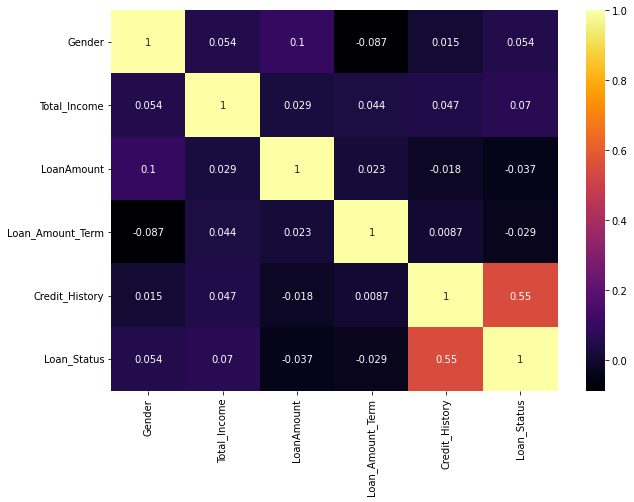

In [ ]:
# Visulization of Coefficient of Correlation Among Columns
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='inferno');

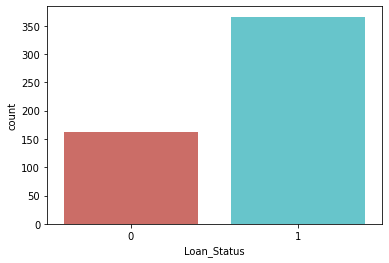

<Figure size 432x288 with 0 Axes>

In [ ]:
# The majority of our cases are approved loans
sns.countplot(x='Loan_Status', data=df, palette='hls')
plt.show()
plt.savefig('count plot')

## Training Test Splits and Creating Models

In [41]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

### First Data Split

In [42]:
df

,Loan_ID,Gender,Total_Income,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,LP001003,1.0,6091,1,No,128.0,360.0,1.0,0
2,LP001005,1.0,3000,0,Yes,66.0,360.0,1.0,1
3,LP001006,1.0,4941,0,No,120.0,360.0,1.0,1
4,LP001008,1.0,6000,0,No,141.0,360.0,1.0,1
5,LP001011,1.0,9613,2,Yes,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,524,0,No,71.0,360.0,1.0,1
610,LP002979,1.0,525,3+,No,40.0,180.0,1.0,1
611,LP002983,1.0,526,1,No,253.0,360.0,1.0,1
612,LP002984,1.0,527,2,No,187.0,360.0,1.0,1


In [43]:
#Capatilized letters indicates matrix
X = df[['LoanAmount', 'Credit_History']]
y = df["Loan_Status"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 14)

In [45]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.58      0.73        53
           1       0.85      0.99      0.91       122

    accuracy                           0.87       175
   macro avg       0.91      0.79      0.82       175
weighted avg       0.88      0.87      0.86       175



In [46]:
print(logmodel.score(X_test, y_test))
pp = logmodel.predict(X_test)
print('Approved: ', sum(pp!=0))
print('Not Approved: ', sum(pp==0))

0.8685714285714285
Approved:  143
Not Approved:  32


### Second Data Split

In [48]:
X = df[['Total_Income', 'Credit_History']]
y = df["Loan_Status"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [50]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61        60
           1       0.78      0.99      0.87       115

    accuracy                           0.81       175
   macro avg       0.87      0.72      0.74       175
weighted avg       0.84      0.81      0.78       175



In [51]:
print(logmodel.score(X_test, y_test))
pp = logmodel.predict(X_test)
print('Approved: ', sum(pp!=0))
print('Not Approved: ', sum(pp==0))

0.8057142857142857
Approved:  147
Not Approved:  28


### Third Data Split

In [52]:
X = df[['LoanAmount', 'Loan_Amount_Term']]
y = df["Loan_Status"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 20)

In [54]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.72      0.99      0.84       127

    accuracy                           0.72       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.53      0.72      0.61       175



In [55]:
print(logmodel.score(X_test, y_test))
pp = logmodel.predict(X_test)
print('Approved: ', sum(pp!=0))
print('Not Approved: ', sum(pp==0))

0.72
Approved:  174
Not Approved:  1


### Visulaing Our Model's ROC

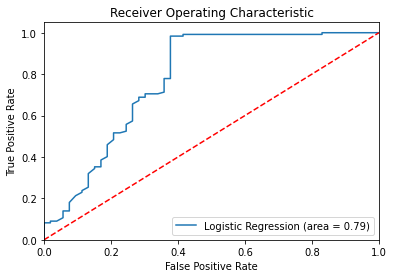

In [47]:
# Please be sure to ONLY RUN THE TEST SPLIT CELL IN WHICH YOU WISH TO SEE
# Rates how well a model can distinguish between classes
# The higher the ROC curve is in relation to the classifier regression, the better the model
# Current graph is for the FIRST TEST SPLIT
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Conclusion

We observed that our first data split, with explanatory variables Loan Amount and Credit History produced the most accurate model. It appears that finding the pair of variables with the highest coefficient of correlation in relation to a given y value yields an accurate model. However, we can not conclude that this process produces the most accurate model. In order to test the hypothesis: the pair of variables with the highest coefficient of determination in relation to a given y value yields the most accurate binary logistic regression model, we would need to set up an experement which creates a regression model for every possible pair of variables. Furthermore, a models accuracy for training data can be significantly different from its accuracy with real world data. More research is needed.

## Future Improvments

People from different salary ranges, have different probabilities of having a credit history, and financial advisors. This leads to better outcomes for them. Because of this, I don't believe that there is a viable reason for keeping them in the same block as the saleries closer to the mean. A future analysis of 'Credit_History' and 'Total_Income' should create blocks based on salary ranges. A unique logistic regression model should be created for each block.